<a href="https://colab.research.google.com/github/maslovalyudmila/ds_school_2020/blob/master/Maslova_NLP_5_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [0]:
# import the data
imdb_train = tfds.load(name='imdb_reviews', split='train', batch_size=-1)
imdb_test = tfds.load(name='imdb_reviews', split='test', batch_size=-1)

In [0]:
# tfds as numpy
imdb_train = tfds.as_numpy(imdb_train)
imdb_test = tfds.as_numpy(imdb_test)

In [35]:
imdb_train['text'] # need to convert bytes?

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

In [36]:
imdb_train['label']

array([0, 0, 0, ..., 0, 0, 1])

In [0]:
# encode the text
decoder = np.vectorize(lambda x: x.decode('UTF-8'))
imdb_train['text'] = decoder(imdb_train['text']) # from bytes to unicode string

In [0]:
# also for the test sample
decoder = np.vectorize(lambda x: x.decode('UTF-8'))
imdb_test['text'] = decoder(imdb_test['text'])

In [0]:
# split the training and validate data

X_train, y_train = imdb_train['text'], imdb_train['label']
X_test, y_test = imdb_test['text'], imdb_train['label']

In [41]:
# stopwords

import nltk
import nltk.corpus
nltk.download('stopwords')

# let's see
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [40]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [0]:
# remove punctuation
table = str.maketrans('', '', string.punctuation)
X_train_cleaned = [w.translate(table) for w in X_train]
X_test_cleaned = [w.translate(table) for w in X_test]

In [0]:
# make the text lower
X_train_lower = [word.lower() for word in X_train_cleaned]
X_test_lower = [word.lower() for word in X_test_cleaned]

In [0]:
# remove stopwords
X_train_normalized = [w for w in X_train_lower if not w in stopwords]
X_test_normalized = [w for w in X_test_lower if not w in stopwords]

# NB! unfortunately i couldn't use stemming & lemmatization, 
# cause even during the circle it converted data too slow
# ~ 1 hour still no result :(

In [51]:
# as an experiment we can look at these tools, they are helpful
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
stem_text = [stemmer.stem(word) for word in (str(X_train_normalized)).split()]

In [0]:
lem_text = [lemmatizer.lemmatize(word) for word in stem_text]

In [58]:
lem_text[:10] # it works in theory

["['thi", 'wa', 'an', 'absolut', 'terribl', 'movi', 'dont', 'be', 'lure', 'in']

In [0]:
# but then we need to join lists to make x assign y dimension
# and got memory error

In [0]:
# it was list, should we convert it to array back again?
X_train_normalized = np.array(X_train_normalized)
X_test_normalized = np.array(X_train_normalized)

In [61]:
# let's look on the results
# if we see them that means the correct dimension
X_test_normalized[y_test == 1][0] # aww kind of film for a snowy sunday afternoon ')

'this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big armchair and mellow for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no rapids to cross no dangerous waters just a warm and witty paddle through new york life at its best a family film in every sense and one that deserves the praise it received'

In [63]:
X_test_normalized[y_test == 0][0] # terrible movie

'this was an absolutely terrible movie dont be lured in by christopher walken or michael ironside both are great actors but this must simply be their worst role in history even their great acting could not redeem this movies ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the columbian rebels were making their cases for revolutions maria conchita alonso appeared phony and her pseudolove affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actors like christopher walkens good name i could barely sit through it'

In [0]:
# finally we did it! our train data is ready for testing

# update the data
X_train = X_train_normalized
X_test = X_test_normalized

**Tfidf + Logreg**

In [67]:
# need vectorize data before
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize X_train
vectorizer = TfidfVectorizer()
vectorized_X_train = vectorizer.fit_transform(X_train)

# vectorize X_test
vectorizer = TfidfVectorizer()
vectorized_X_test = vectorizer.fit_transform(X_test)

print(vectorized_X_train.shape)
print(vectorized_X_test.shape)

(25000, 120674)
(25000, 120674)


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(vectorized_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
log_reg_predictions = log_reg.predict(vectorized_X_test)
classification_report(log_reg_predictions, y_test)
print(classification_report(log_reg_predictions, y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     12391
           1       0.94      0.93      0.93     12609

    accuracy                           0.93     25000
   macro avg       0.93      0.93      0.93     25000
weighted avg       0.93      0.93      0.93     25000



In [91]:
confusion_matrix(y_test, log_reg_predictions)

array([[11607,   893],
       [  784, 11716]])

In [83]:
print(11607+11716) # 23 323 correct predictions
print(784+893) # 1 677 incorrect predictions

23323
1677


In [0]:
# accuracy 0.93 = 93% good!

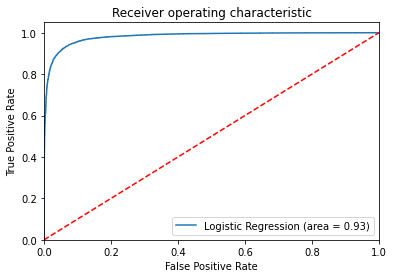

In [95]:
# vizualize the data

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

logit_roc_auc = roc_auc_score(y_test, log_reg.predict(vectorized_X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(vectorized_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
# The dotted line represents the ROC curve
# a good classifier stays far away from that line (toward the top-left corner)

**Tokenizer + Dense**

In [0]:
# import the tokenizer to convert the data 
from tensorflow.keras.preprocessing.text import Tokenizer

# it creates one vector per document for input
# the length of the vectors = size of the vocabulary
tokenizer = Tokenizer(num_words=2)

# fit the tokenizer on the data
tokenizer.fit_on_texts(X_train)
X_train_tokenized = tokenizer.texts_to_matrix(X_train) # shape (25000, 2)

In [0]:
# also for test data
tokenizer.fit_on_texts(X_test)
X_test_tokenized = tokenizer.texts_to_matrix(X_test) # shape (25000, 2)

In [0]:
# import keras dense model
from keras.models import Sequential
from keras.layers import Dense

# build model artchitecture
model = Sequential( [
                     Dense(64, activation='relu', input_shape=(2,)),
                     Dense(1, activation='sigmoid'),])

In [0]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [146]:
# let's test it
hist = model.fit(X_train_tokenized, y_train, batch_size=64, epochs=10, validation_data=(X_test_tokenized, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 1s 32us/step - loss: 0.6933 - accuracy: 0.4946 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
25000/25000 [==============================] - 1s 29us/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 3/10
25000/25000 [==============================] - 1s 31us/step - loss: 0.6933 - accuracy: 0.4942 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 4/10
25000/25000 [==============================] - 1s 30us/step - loss: 0.6933 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 5/10
25000/25000 [==============================] - 1s 30us/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
25000/25000 [==============================] - 1s 31us/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
25000/25000 [==============================] - 1s 30us/st

In [103]:
# well, not impressed by the accuracy

model.evaluate(X_test_tokenized, y_test)[1]

25000/25000 [==============================] - 0s 17us/step


0.5

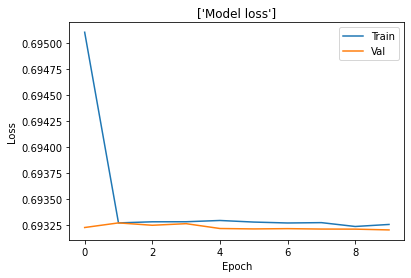

In [104]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title(['Model loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

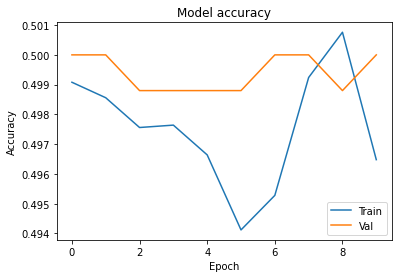

In [105]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [184]:
# explore precision recall score
predictions_dense = model.predict_classes(X_train_tokenized)
classification_report(predictions_dense, y_test)
print(classification_report(predictions_dense, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67     25000

    accuracy                           0.50     25000
   macro avg       0.50      0.25      0.33     25000
weighted avg       1.00      0.50      0.67     25000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Embedding + RNN**

In [0]:
# padding all input sequences to have the same length
from keras.preprocessing.sequence import pad_sequences

X_train_embedding = pad_sequences(tokenizer.texts_to_sequences(X_train))
X_test_embedding = pad_sequences(tokenizer.texts_to_sequences(X_test))

In [0]:
# building the archirecture of NN with embedding layer
from keras.layers import Embedding, SimpleRNN

# input dim = size of the vocabulary (len(X_train_embedding) = 25000)
# output dim = size of the vector space in which words will be embeded [32:]
# input length = length of input sequences

model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [176]:
hist = model.fit(X_train_embedding, y_train, epochs=10, batch_size=1000, validation_data=(X_test_embedding, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 8s 319us/step - loss: 0.6934 - accuracy: 0.5113 - val_loss: 0.6924 - val_accuracy: 0.5178
Epoch 2/10
25000/25000 [==============================] - 7s 283us/step - loss: 0.6929 - accuracy: 0.5079 - val_loss: 0.6929 - val_accuracy: 0.5188
Epoch 3/10
25000/25000 [==============================] - 7s 282us/step - loss: 0.6924 - accuracy: 0.5139 - val_loss: 0.6928 - val_accuracy: 0.5141
Epoch 4/10
25000/25000 [==============================] - 7s 282us/step - loss: 0.6929 - accuracy: 0.5094 - val_loss: 0.6920 - val_accuracy: 0.5197
Epoch 5/10
25000/25000 [==============================] - 7s 290us/step - loss: 0.6924 - accuracy: 0.5139 - val_loss: 0.6920 - val_accuracy: 0.5202
Epoch 6/10
25000/25000 [==============================] - 7s 280us/step - loss: 0.6923 - accuracy: 0.5170 - val_loss: 0.6926 - val_accuracy: 0.5078
Epoch 7/10
25000/25000 [==============================] - 7s 2

In [177]:
# not impressed again with accuracy

model.evaluate(X_test_embedding, y_test)[1]

25000/25000 [==============================] - 8s 310us/step


0.5149999856948853

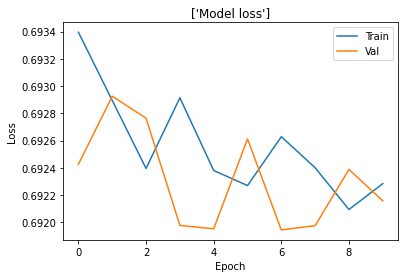

In [178]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title(['Model loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

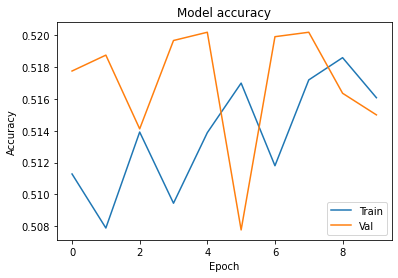

In [179]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [185]:
predictions_rnn = model.predict_classes(X_train_embedding)
classification_report(predictions_rnn, y_test)
print(classification_report(predictions_rnn, y_test))

              precision    recall  f1-score   support

           0       0.40      0.52      0.45      9605
           1       0.63      0.51      0.57     15395

    accuracy                           0.52     25000
   macro avg       0.52      0.52      0.51     25000
weighted avg       0.54      0.52      0.52     25000



**CONCLUSION:**

Logreg model

*   accuracy: 0.93 (93% > 70%)
*   precision, recall:

In [180]:
print(classification_report(log_reg_predictions, y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     12391
           1       0.94      0.93      0.93     12609

    accuracy                           0.93     25000
   macro avg       0.93      0.93      0.93     25000
weighted avg       0.93      0.93      0.93     25000



Dense model

* accuracy: 0.50 (50% < 70%)
* precision, recall:

In [181]:
print(classification_report(predictions_dense, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67     25000

    accuracy                           0.50     25000
   macro avg       0.50      0.25      0.33     25000
weighted avg       1.00      0.50      0.67     25000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RNN model

*   accuracy: 0.52 (52% < 70%)
*   precisions, recall:

In [183]:
print(classification_report(predictions_rnn, y_test))

              precision    recall  f1-score   support

           0       0.40      0.52      0.45      9605
           1       0.63      0.51      0.57     15395

    accuracy                           0.52     25000
   macro avg       0.52      0.52      0.51     25000
weighted avg       0.54      0.52      0.52     25000



Well, we see that Logistic Regression model demonstated quite high accuracy, preciison and recall score.

RNN showed a few more accurate result than Dense (about 2%), but the score still too low to make predictions.

The precision showes the share of reviews truly belonging to the specific class. For example, Dense model demonstrates higher (27%) score in positive reviews then RNN. But far lower than Logreg.

The recall showes the share found reviews that belong to the specific class regarding all reviews in test sample. Dense recall score is a few higher (1%) by comparison with RNN.